# Measuring spectral indices

**- Consider pre-defined spectral indices to measure the depth of water, methane, ammonia, and silicates absorption features in mid-infrared spectra of ultracool objects.**

**- Define your own spectral indices to measure the strength of other spectral features of interest at any wavelength.**

In [1]:
import seda
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from astropy.io import ascii


    SEDA v0.5.1.dev2 package imported


**Pre-defined spectral indices**

Read the spectra of interest.

As an example, for silicate and water indices let's read the Spitzer IRS spectrum for the L6 dwarf 2MASS J21481628+4003593 published in [Looper et al. (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJ...686..528L) and reprocessed by [Suárez & Metchev (2022)](https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.5701S/abstract).

This spectrum has a strong silicate absorption at 9.3 microns and prominent water absorption at 6.25 microns.

In [2]:
# path to the seda package
path_seda = os.path.dirname(os.path.dirname(seda.__file__))

IRS = ascii.read(path_seda+'/docs/notebooks/data/2148+4003_IRS_spectrum.dat')
wl_2148 = IRS['wl(um)'] # in um
flux_2148 = IRS['flux(Jy)'] # in Jy
eflux_2148 = IRS['eflux(Jy)'] # in Jy

Plot the spectrum:

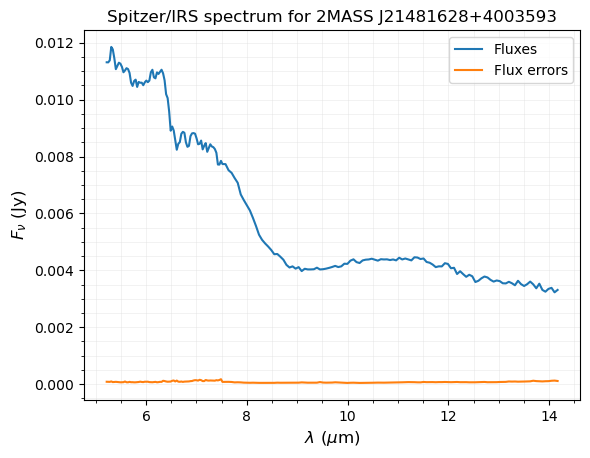

In [3]:
fig, ax = plt.subplots()

plt.plot(wl_2148, flux_2148, label='Fluxes')
plt.plot(wl_2148, eflux_2148, label='Flux errors')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', color='gainsboro', linewidth=0.5, alpha=0.5)
ax.legend()

plt.xlabel(r'$\lambda\ (\mu$m)', size=12)
plt.ylabel(r'$F_\nu$ (Jy)', size=12)
plt.title('Spitzer/IRS spectrum for 2MASS J21481628+4003593')

plt.show()

**Measure the silicate index, show the results, and save the figure.**

Look at the input parameters [here](https://seda.readthedocs.io/en/latest/api.html#seda.spectral_indices.spectral_indices.silicate_index) or using the following command directly in your notebook:

``help(seda.spectral_indices.silicate_index)``

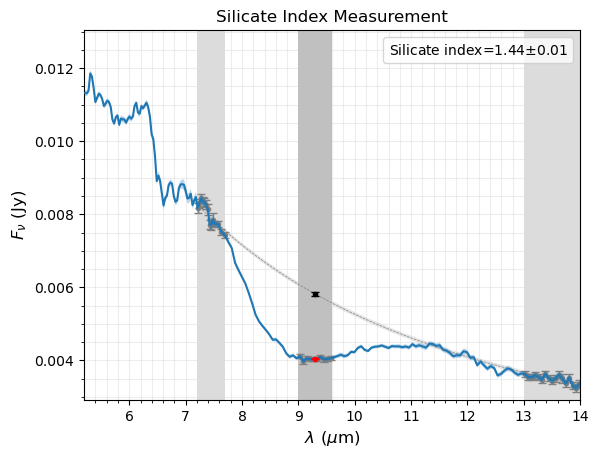

In [6]:
out_silicate_index = seda.spectral_indices.silicate_index(wl_2148, flux_2148, eflux_2148, 
                                                          plot=True, plot_save=True)

Extract relevant parameters from the output dictionary

In [7]:
silicate_index = out_silicate_index['silicate_index'] # silicate index
esilicate_index = out_silicate_index['esilicate_index'] # silicate index error
print(f'silicate index = {round(silicate_index,2)}+-{round(esilicate_index,2)}')

silicate index = 1.44+-0.01


**Measure the water index, show the results, and save the figure.**

Look at the input parameters [here](https://seda.readthedocs.io/en/latest/api.html#seda.spectral_indices.spectral_indices.water_index).

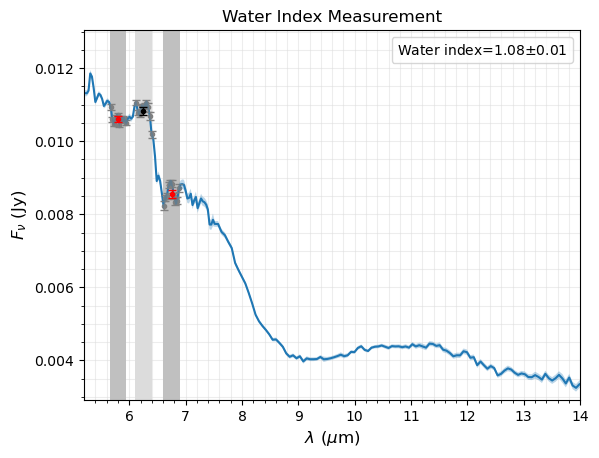

In [8]:
out_water_index = seda.spectral_indices.water_index(wl=wl_2148, flux=flux_2148, eflux=eflux_2148, 
                                                    plot=True, plot_save=True)

Extract relevant parameters from the output dictionary

In [9]:
water_index = out_water_index['water_index'] # water index
ewater_index = out_water_index['ewater_index'] # water index uncertainty
print(f'water index = {round(water_index,2)}+-{round(ewater_index,2)}')

water index = 1.08+-0.01


For methane and ammonia indices:

Read Spitzer IRS spectrum for the T8 dwarf 2MASS J04151954-0935066 
published in [Saumon et al. (2007)](https://ui.adsabs.harvard.edu/abs/2007ApJ...656.1136S) and reprocessed by [Suárez & Metchev (2022)](https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.5701S/abstract).

This spectrum has strong absorptions by methane at 7.65 microns and ammonia at 6.25 microns.

In [10]:
IRS = ascii.read(path_seda+'/docs/notebooks/data/0415-0935_IRS_spectrum.dat')
wl_0415 = IRS['wl(um)'] # in um
flux_0415 = IRS['flux(Jy)'] # in Jy
eflux_0415 = IRS['eflux(Jy)'] # in Jy

Plot the spectrum:

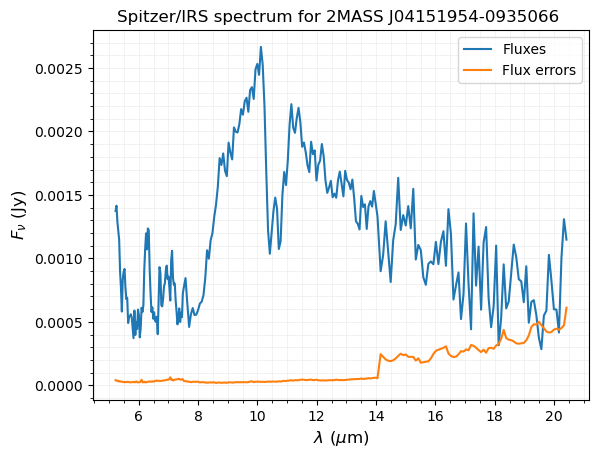

In [11]:
fig, ax = plt.subplots()

plt.plot(wl_0415, flux_0415, label='Fluxes')
plt.plot(wl_0415, eflux_0415, label='Flux errors')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', color='gainsboro', linewidth=0.5, alpha=0.5)
ax.legend()

plt.xlabel(r'$\lambda\ (\mu$m)', size=12)
plt.ylabel(r'$F_\nu$ (Jy)', size=12)
plt.title('Spitzer/IRS spectrum for 2MASS J04151954-0935066 ')

plt.show()

**Measure the methane index, show the results, and save the figure.**

Look at the input parameters [here](https://seda.readthedocs.io/en/latest/api.html#seda.spectral_indices.spectral_indices.methane_index).

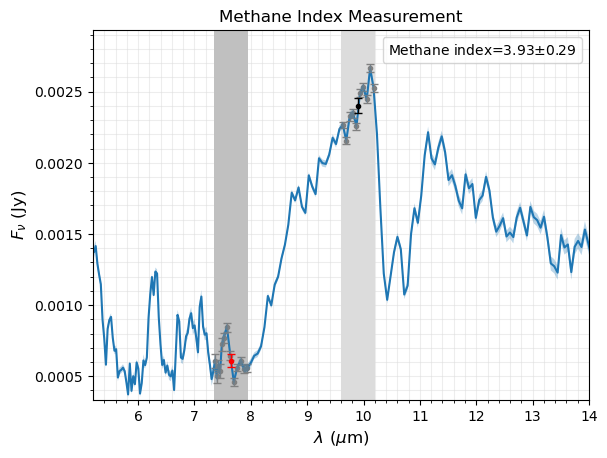

In [12]:
out_methane_index = seda.spectral_indices.methane_index(wl_0415, flux_0415, eflux_0415, 
                                                        plot=True, plot_save=True)

Extract relevant parameters from the output dictionary

In [13]:
methane_index = out_methane_index['methane_index'] # methane index
emethane_index = out_methane_index['emethane_index'] # methane index uncertainty
print(f'methane index = {round(methane_index,2)}+-{round(emethane_index,2)}')

methane index = 3.93+-0.29


**Measure the ammonia index, show the results, and save the figure.**

Look at the input parameters [here](https://seda.readthedocs.io/en/latest/api.html#seda.spectral_indices.spectral_indices.ammonia_index).

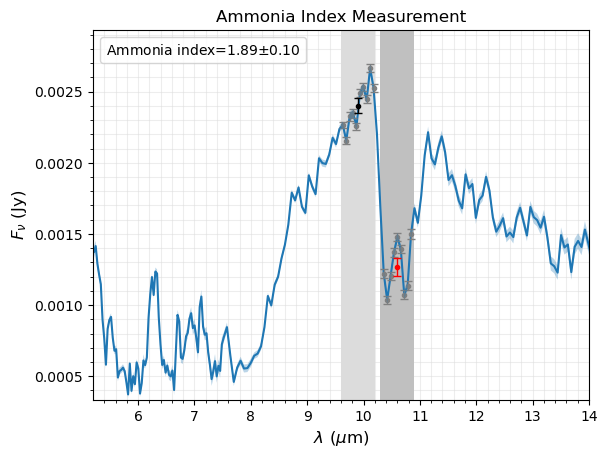

In [14]:
out_ammonia_index = seda.spectral_indices.ammonia_index(wl_0415, flux_0415, eflux_0415,
                                                        plot=True, plot_save=True)

Plot the spectrum

**Measure a user-defined index for CO$_2$**

Read the spectrum exbihiting the feature of interest.

As an example, let's read the AKARI/IRC spectrum for the T8 dwarf 2MASS J04151954-0935066 in [Sorahana & Yamamura (2012)](https://ui.adsabs.harvard.edu/abs/2012ApJ...760..151S).

This spectrum has strong CH$_4$ at 3.3 microns, CO at 4.6 microns, and CO$_2$ at 4.2 microns.

Read the AKARI spectrum:

In [15]:
AKARI = ascii.read(path_seda+'/docs/notebooks/data/0415-0935_AKARI_spectrum.dat')
wl_AKARI = AKARI['wl(um)'] # um 
flux_AKARI = AKARI['flux(Jy)'] # Jy
eflux_AKARI = AKARI['eflux(Jy)'] # Jy

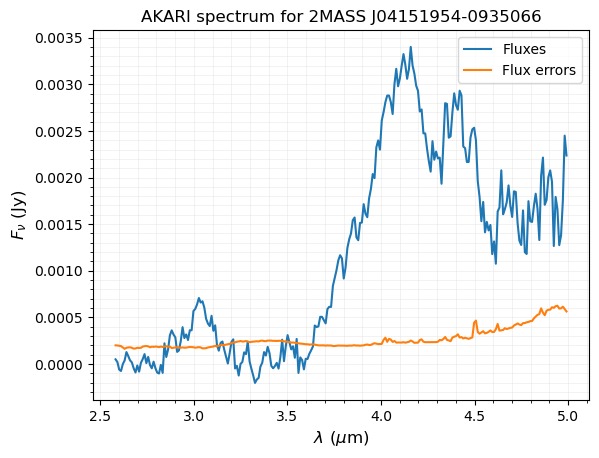

In [16]:
fig, ax = plt.subplots()

plt.plot(wl_AKARI, flux_AKARI, label='Fluxes')
plt.plot(wl_AKARI, eflux_AKARI, label='Flux errors')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', color='gainsboro', linewidth=0.5, alpha=0.5)
ax.legend()

plt.xlabel(r'$\lambda\ (\mu$m)', size=12)
plt.ylabel(r'$F_\nu$ (Jy)', size=12)
plt.title('AKARI spectrum for 2MASS J04151954-0935066')

plt.show()

Define the index parameters and measure the index.

Look at the input parameters [here](https://seda.readthedocs.io/en/latest/api.html#seda.spectral_indices.spectral_indices.user_index).

Index considering one continuum region:

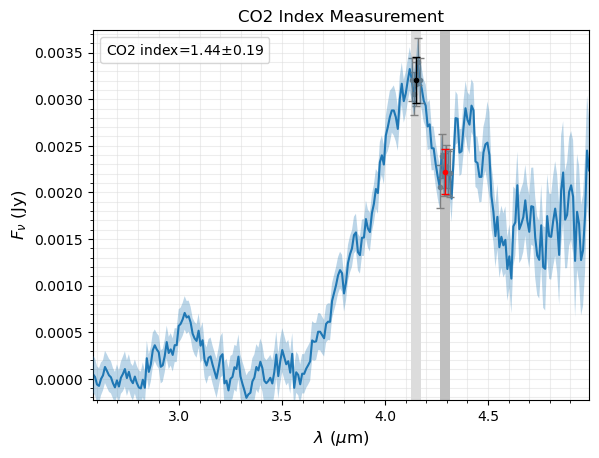

In [17]:
# wavelength at the center of the feature
feature_wl = 4.29 # um 
# wavelength window to obtain the mean flux at the feature
feature_window = 0.05 # um
# wavelength at the continuum region
continuum_wl = 4.15 # um 
# wavelength window to obtain the mean flux at the continuum
continuum_window = 0.05 # um
# set a name for the index
index_name = 'CO2'

# measure the user-defined index
out_user_index = seda.spectral_indices.user_index(wl=wl_AKARI, flux=flux_AKARI, eflux=eflux_AKARI, 
                                                  feature_wl=feature_wl, feature_window=feature_window,
                                                  continuum_wl=continuum_wl, continuum_window=continuum_window,
                                                  index_name=index_name,
                                                  plot=True, plot_save=True)

Index considering two continuum regions:

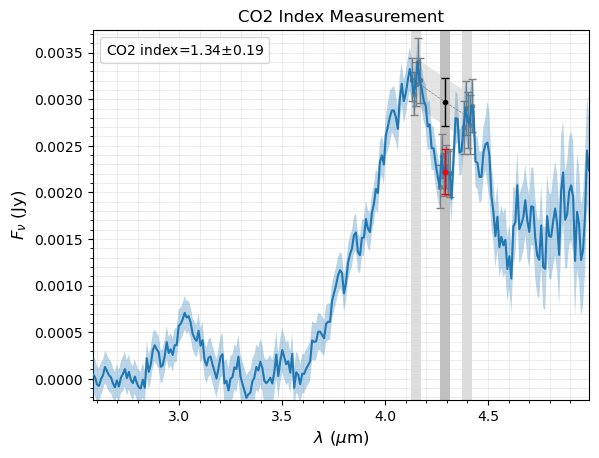

In [18]:
# wavelength at the center of the feature
feature_wl = 4.29 # um 
# wavelength window to obtain the mean flux at the feature
feature_window = 0.05 # um
# wavelength at the short-wavelength continuum region
continuum_wl1 = 4.15 # um 
# wavelength window to obtain the mean flux at the short-wavelength continuum
continuum_window1 = 0.05 # um
# wavelength at the long-wavelength continuum region
continuum_wl2 = 4.40 # um 
# wavelength window to obtain the mean flux at the long-wavelength continuum
continuum_window2 = 0.05 # um
# set a name for the index
index_name = 'CO2'
# indicate the curve fit to the continuum regions
continuum_fit = 'exponential'
# indicate the option to estimate the continuum flux error
continuum_error = 'empirical'


# measure the user-defined index
out_user_index = seda.spectral_indices.user_index(wl=wl_AKARI, flux=flux_AKARI, eflux=eflux_AKARI, 
                                                  feature_wl=feature_wl, feature_window=feature_window,
                                                  continuum_wl1=continuum_wl1, 
                                                  continuum_window1=continuum_window1,
                                                  continuum_wl2=continuum_wl2, 
                                                  continuum_window2=continuum_window2,
                                                  index_name=index_name, continuum_fit=continuum_fit, 
                                                  continuum_error=continuum_error,plot=True, plot_save=True)